In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up for displaying plots in the notebook
%matplotlib inline

# Set a more visually appealing style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Load the academic performance dataset
df = pd.read_csv('academic_performance_clean.csv')

# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,StudentID,Gender,Age,GPA,StudyHours,Attendance,Course,LogStudyHours
0,S001,M,24,3.110000,11.0,77.0,Chemistry,2.484907
1,S002,F,16,3.650000,14.0,87.0,Math,2.708050
2,S003,M,20,3.048144,18.0,87.0,Chemistry,2.944439
3,S004,M,20,3.048144,19.0,80.0,Math,2.995732
4,S005,M,18,3.048144,9.0,80.0,Chemistry,2.302585


In [3]:
# Get basic information about the dataset
print("Dataset information:")
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StudentID      100 non-null    object 
 1   Gender         100 non-null    object 
 2   Age            100 non-null    int64  
 3   GPA            100 non-null    float64
 4   StudyHours     100 non-null    float64
 5   Attendance     100 non-null    float64
 6   Course         100 non-null    object 
 7   LogStudyHours  100 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 6.4+ KB


In [4]:
# Get summary statistics for numeric columns
print("Summary statistics for the entire dataset:")
df.describe()

Summary statistics for the entire dataset:


,Age,GPA,StudyHours,Attendance,LogStudyHours
count,100.00000,100.000000,100.000000,100.000000,100.000000
mean,19.93000,3.048144,15.345000,85.587629,2.733366
std,1.51927,0.452154,4.998836,9.491892,0.390347
min,16.00000,1.990000,1.500000,64.000000,0.916291
25%,19.00000,2.655000,12.000000,79.000000,2.564949
50%,20.00000,3.110000,15.000000,85.793814,2.772589
75%,21.00000,3.332500,19.000000,92.000000,2.995732
max,24.00000,4.000000,29.500000,100.000000,3.417727


In [5]:
# Calculate summary statistics grouped by course
grouped_stats = df.groupby('Course')['GPA'].agg([
    'count', 'mean', 'median', 'min', 'max', 'std'
])

print("Summary statistics of GPA grouped by course:")
grouped_stats

Summary statistics of GPA grouped by course:


,count,mean,median,min,max,std
Course,,,,,,
Biology,15,3.023333,3.170000,1.99,4.00,0.532215
CS,20,3.006000,2.985000,2.07,4.00,0.505771
Chemistry,19,3.018226,3.048144,2.31,3.48,0.310235
Math,24,3.013673,3.069072,2.19,3.95,0.467613
Physics,22,3.166818,3.260000,2.34,4.00,0.449988


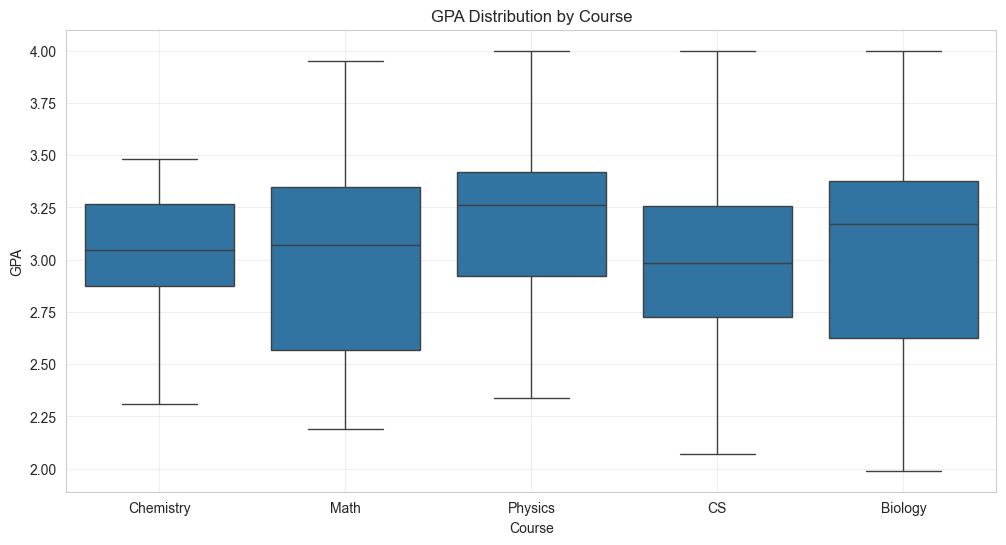

In [6]:
# Visualize the distribution of GPA by Course
plt.figure(figsize=(12, 6))
sns.boxplot(x='Course', y='GPA', data=df)
plt.title('GPA Distribution by Course')
plt.grid(True, alpha=0.3)
plt.show()

In [7]:
# Create a list that contains a numeric value for each response to the categorical variable
# We'll map the gender to numeric values
gender_mapping = {'M': 0, 'F': 1}
df['GenderNumeric'] = df['Gender'].map(gender_mapping)

print("First 5 rows after mapping gender to numeric values:")
df.head()

First 5 rows after mapping gender to numeric values:


,StudentID,Gender,Age,GPA,StudyHours,Attendance,Course,LogStudyHours,GenderNumeric
0,S001,M,24,3.110000,11.0,77.0,Chemistry,2.484907,0
1,S002,F,16,3.650000,14.0,87.0,Math,2.708050,1
2,S003,M,20,3.048144,18.0,87.0,Chemistry,2.944439,0
3,S004,M,20,3.048144,19.0,80.0,Math,2.995732,0
4,S005,M,18,3.048144,9.0,80.0,Chemistry,2.302585,0


In [8]:
# Calculate and visualize summary statistics by gender
gender_stats = df.groupby('Gender')['GPA'].agg([
    'count', 'mean', 'median', 'min', 'max', 'std'
])

print("Summary statistics of GPA grouped by gender:")
gender_stats

Summary statistics of GPA grouped by gender:


,count,mean,median,min,max,std
Gender,,,,,,
F,56,3.034107,3.125,1.99,4.0,0.480313
M,44,3.066010,3.100,2.31,4.0,0.418364


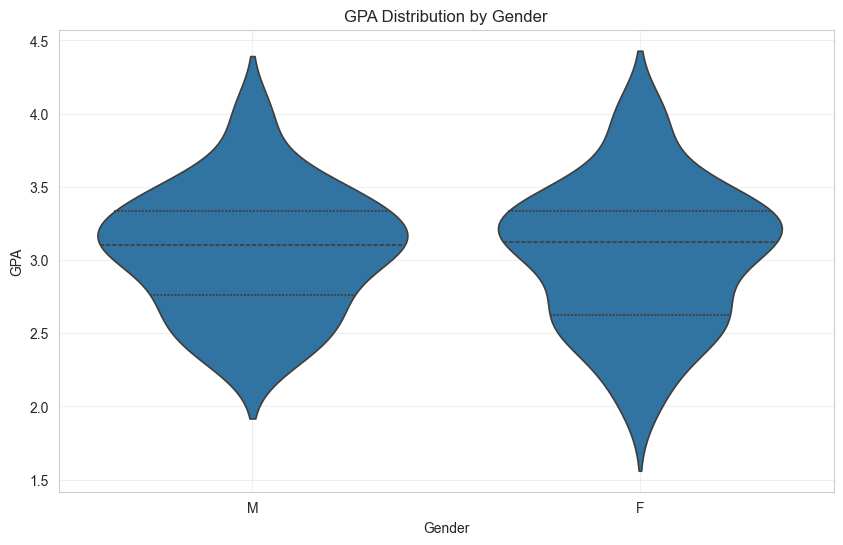

In [9]:
# Visualize the distribution of GPA by Gender
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='GPA', data=df, inner='quartile')
plt.title('GPA Distribution by Gender')
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
# Load the Iris dataset
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print("First 5 rows of the Iris dataset:")
iris_df.head()

First 5 rows of the Iris dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
# Display overall statistics for the dataset
print("Overall statistics for the Iris dataset:")
iris_df.describe()

Overall statistics for the Iris dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# Count of samples per species
print("Count of samples per species:")
iris_df['species'].value_counts()

Count of samples per species:


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [13]:
# Display statistical details for each species
for species in iris.target_names:
    print(f"\nStatistical details for {species}:")
    species_data = iris_df[iris_df['species'] == species].iloc[:, :4]  # Select only numeric columns
    
    # Basic statistics
    print("\nBasic Statistics:")
    print(species_data.describe())
    
    # Percentiles
    percentiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95]
    print("\nPercentiles:")
    print(species_data.quantile(percentiles))
    
    # Additional statistics
    print("\nAdditional Statistics:")
    print("Variance:")
    print(species_data.var())
    print("\nSkewness:")
    print(species_data.skew())
    print("\nKurtosis:")
    print(species_data.kurtosis())


Statistical details for setosa:

Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  
count         50.000000  
mean           0.246000  
std            0.105386  
min            0.100000  
25%            0.200000  
50%            0.200000  
75%            0.300000  
max            0.600000  

Percentiles:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0.10               4.59            

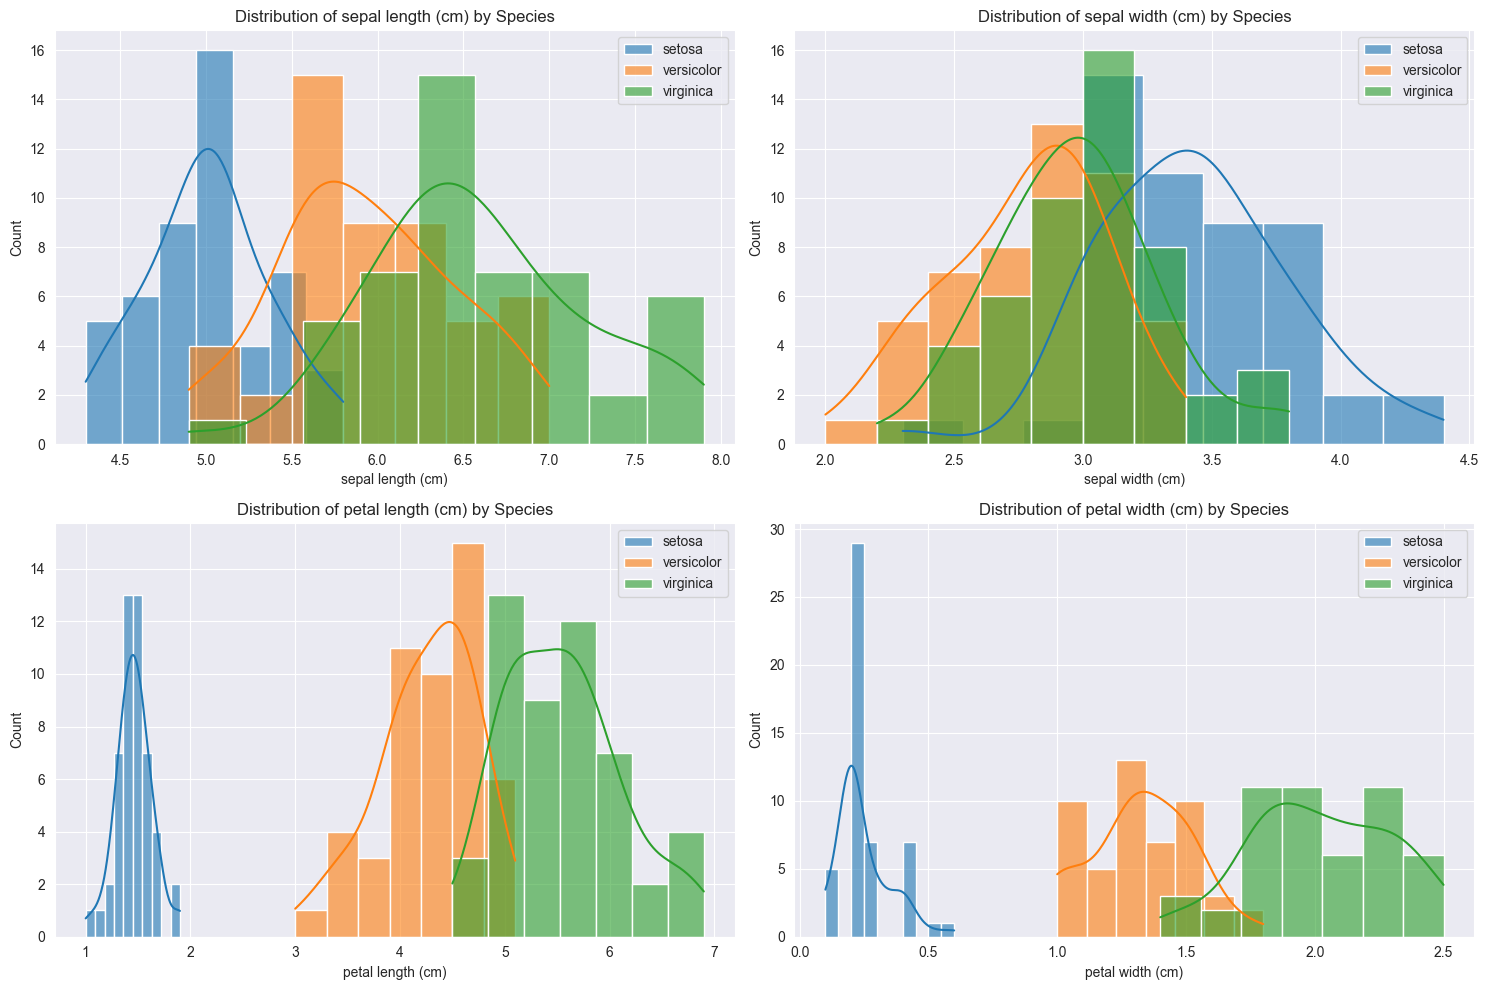

In [14]:
# Visualize the differences between species (histograms)
plt.figure(figsize=(15, 10))

for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    for species in iris.target_names:
        subset = iris_df[iris_df['species'] == species]
        sns.histplot(subset[feature], label=species, kde=True, alpha=0.6)
    plt.title(f'Distribution of {feature} by Species')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()

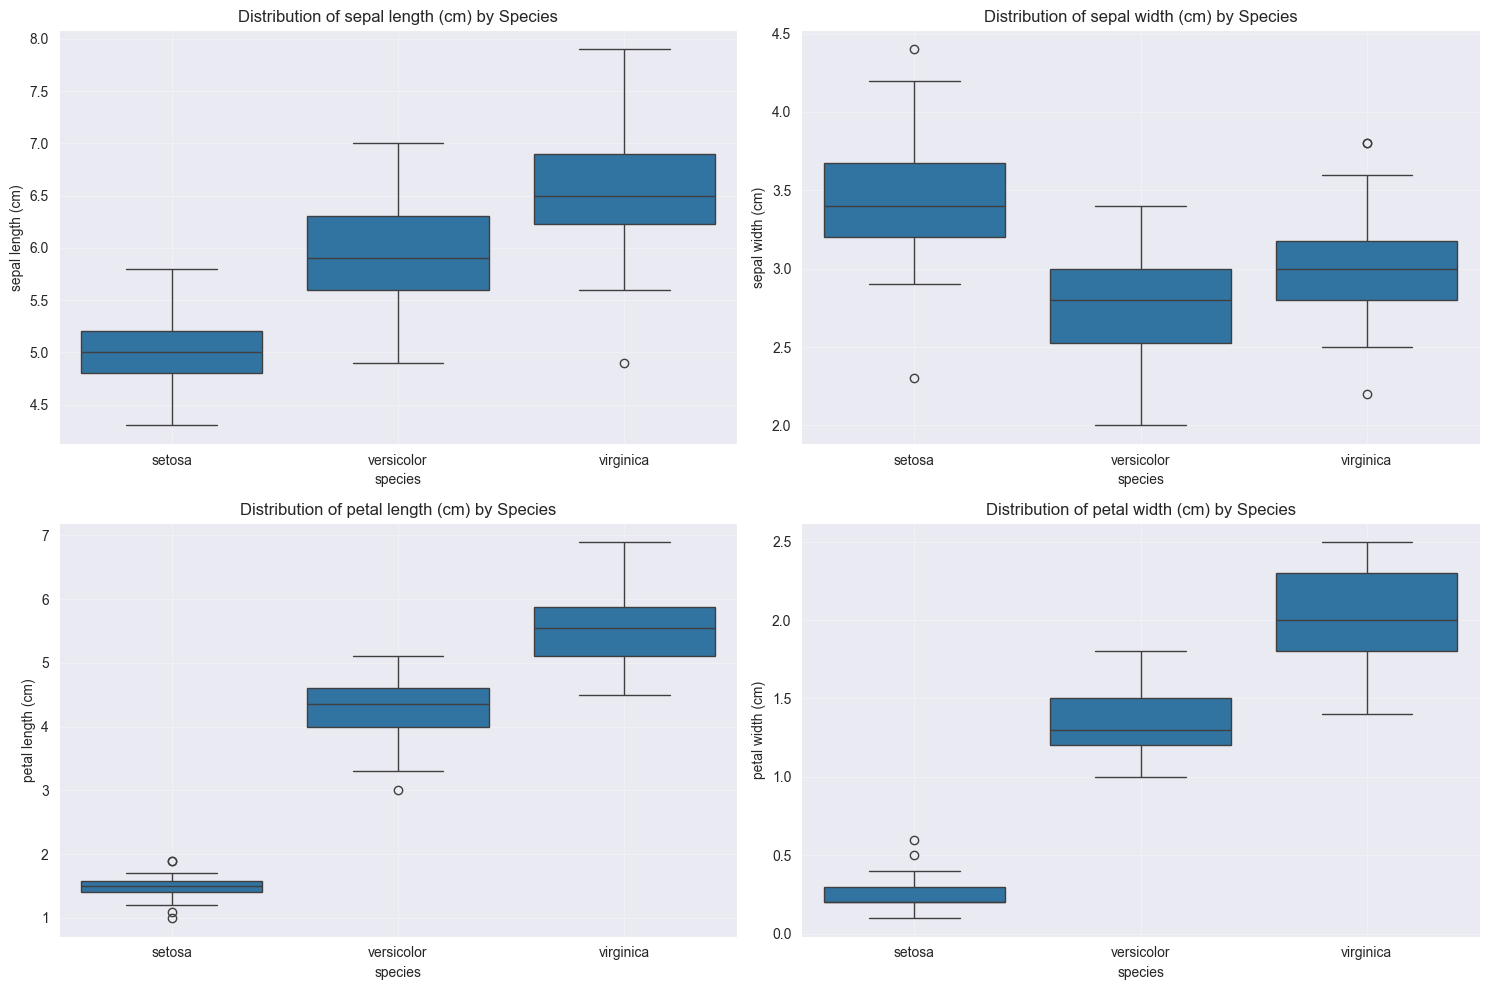

In [15]:
# Create boxplots for each feature by species
plt.figure(figsize=(15, 10))

for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(f'Distribution of {feature} by Species')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

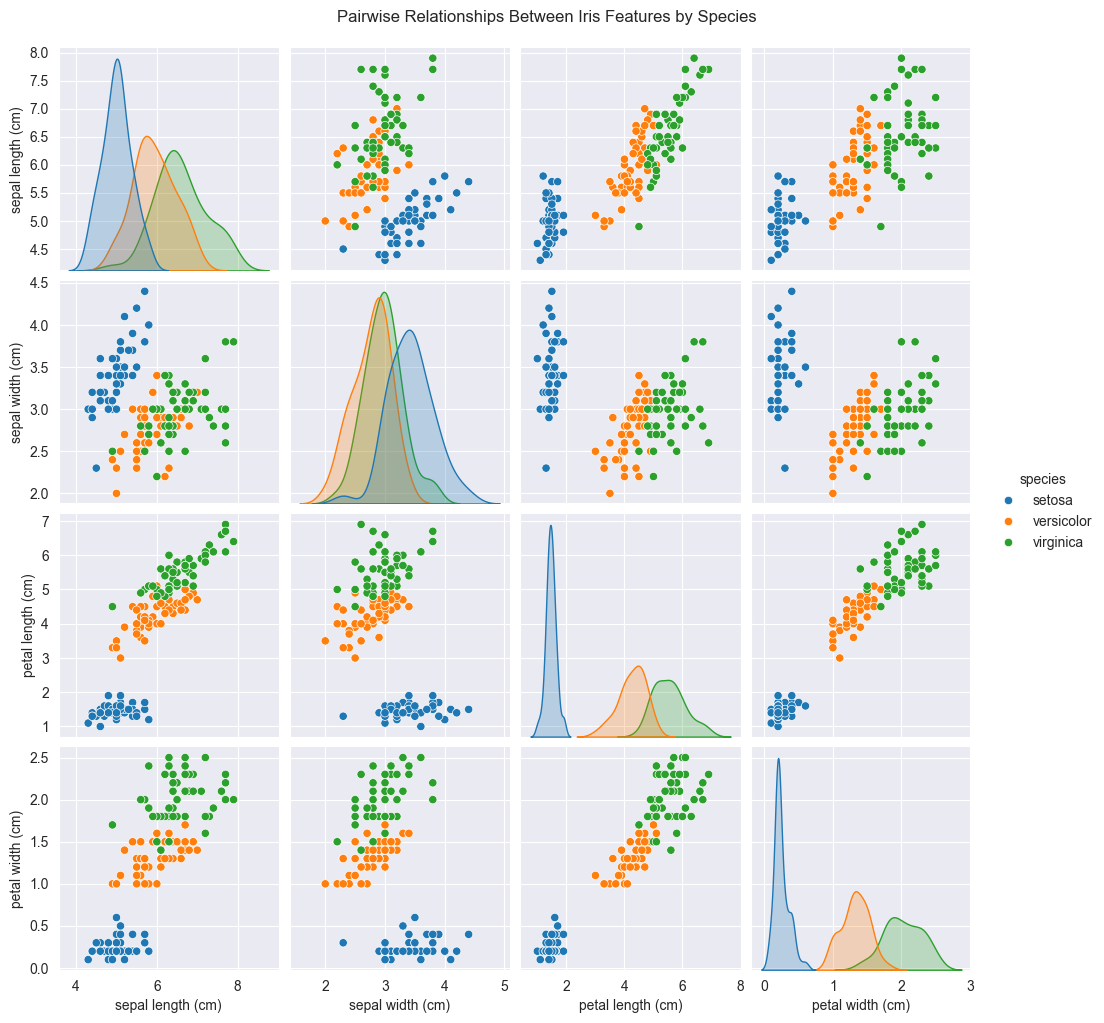

In [16]:
# Create a pairplot to visualize relationships between features for each species
sns.pairplot(iris_df, hue='species', height=2.5)
plt.suptitle('Pairwise Relationships Between Iris Features by Species', y=1.02)
plt.show()

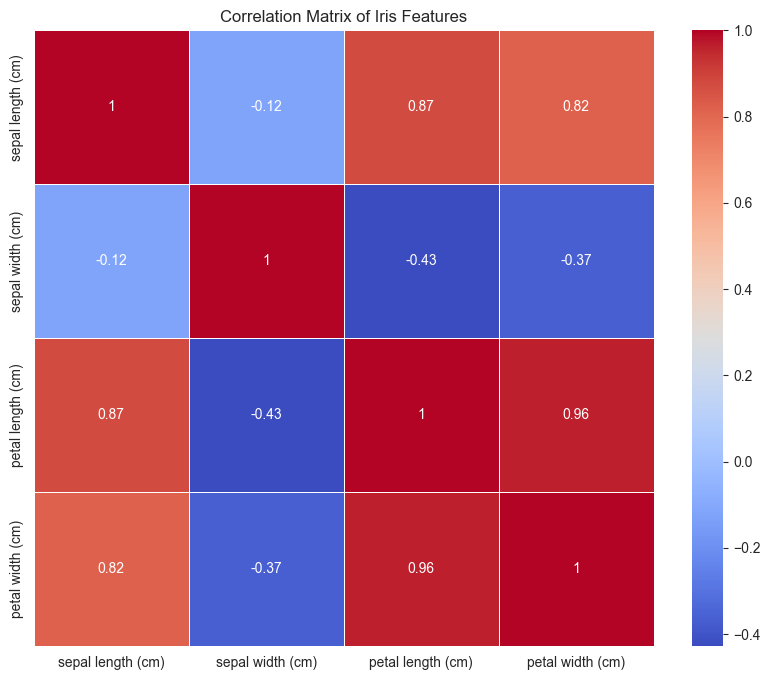

In [17]:
# Create a correlation matrix for the numeric features
plt.figure(figsize=(10, 8))
correlation_matrix = iris_df.iloc[:, :4].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Iris Features')
plt.show()